## 빅데이터 활용 AI 설계
# LSTM 문자 예측기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### 데이터 전처리

In [3]:
f = open('날씨.txt', encoding='utf-8') # 'cp949'
text = f.read()
f.close()

text

"아침저녁 선선하지만 낮엔 여전히 덥다. 오전 최저 17~23도, 낮 최고 26~30도. 전북은 오전, 영동지방과 제주도, 남해안은 오후에 곳곳 비 내리겠다. \n\n☞공기와 자외선=공기 맑은 일요일. 미세먼지 지수 '좋음,' 오존 '보통.' 오후에 대부분의 지역 자외선 '나쁨.' \n\n☞오늘은?=등산 가기 딱 좋은 날씨. 곧이 태백, 소백산맥의 깊은 산이 아니더라도 도시 부근의 명산에 요산인(樂山人)들이 몰릴 듯. 아직은 낮에 30도 오르내리므로 무리하지 않아야 한다. 산행에 욕심을 내거나 산을 무시하면 대가를 치른다는 것 명심해야 한다. \n\n산행 전에 자외선 차단제를 바르고 모자와 선글라스를 쓴다. 자외선 차단제는 2시간 마다 다시 바르도록 한다. 또 수건을 충분히 준비하고 땀을 흘려 저체온이 될 때를 대비해서 얇은 겉옷을 챙기는 것이 좋다. 물을 충분히 준비하고 30분마다 마시는 것도 잊지 말 것. \n\n여름에는 해충과 뱀이 활동하기 때문에 가급적 긴 바지를 입고, 뱀에게 물리거나 벌레에 쏘여 통증과 마비 증세가 나타나면 곧바로 119로 구조요청을 한다. \n\n과유불급, 어떤 식으로든 통증이 생겨 심해지면 곧바로 산행을 중단하고 천천히 내려와야 한다. 산행 전에도 관절을 충분히 풀고, 산행 뒤에도 관절 마사지와 스트레칭을 하는 것 잊지 말 것."

In [3]:
chars = sorted(list(set(text)))
print('사용되고 있는 문자의 수:', len(chars))
print(chars)

사용되고 있는 문자의 수: 190
['\n', ' ', "'", '(', ')', ',', '.', '0', '1', '2', '3', '6', '7', '9', '=', '?', '~', '☞', '人', '山', '가', '간', '거', '건', '것', '겉', '게', '겠', '겨', '고', '곧', '곳', '공', '과', '관', '구', '근', '글', '급', '기', '긴', '깊', '나', '날', '남', '낮', '내', '녁', '는', '늘', '니', '다', '단', '대', '더', '덥', '도', '동', '될', '뒤', '든', '들', '듯', '등', '딱', '땀', '때', '떤', '또', '라', '레', '려', '로', '록', '르', '른', '를', '름', '리', '릴', '마', '만', '말', '맑', '맥', '먼', '면', '명', '모', '몰', '무', '문', '물', '므', '미', '바', '방', '백', '뱀', '벌', '보', '부', '북', '분', '불', '비', '쁨', '사', '산', '생', '서', '선', '세', '소', '수', '스', '시', '식', '심', '쏘', '쓴', '씨', '아', '안', '않', '야', '얇', '어', '에', '엔', '여', '역', '영', '오', '온', '옷', '와', '외', '요', '욕', '유', '으', '은', '을', '음', '의', '이', '인', '일', '입', '잊', '자', '저', '적', '전', '절', '제', '조', '존', '좋', '주', '준', '중', '증', '지', '직', '차', '챙', '천', '청', '체', '최', '충', '치', '침', '칭', '타', '태', '통', '트', '풀', '하', '한', '해', '행', '활', '후', '흘', '히', '樂']


In [4]:
char_indices = dict((c, i) for i, c in enumerate(chars)) # 문자 → ID
indices_char = dict((i, c) for i, c in enumerate(chars)) # ID → 문자

In [5]:
print(char_indices)
print(indices_char)

{'\n': 0, ' ': 1, "'": 2, '(': 3, ')': 4, ',': 5, '.': 6, '0': 7, '1': 8, '2': 9, '3': 10, '6': 11, '7': 12, '9': 13, '=': 14, '?': 15, '~': 16, '☞': 17, '人': 18, '山': 19, '가': 20, '간': 21, '거': 22, '건': 23, '것': 24, '겉': 25, '게': 26, '겠': 27, '겨': 28, '고': 29, '곧': 30, '곳': 31, '공': 32, '과': 33, '관': 34, '구': 35, '근': 36, '글': 37, '급': 38, '기': 39, '긴': 40, '깊': 41, '나': 42, '날': 43, '남': 44, '낮': 45, '내': 46, '녁': 47, '는': 48, '늘': 49, '니': 50, '다': 51, '단': 52, '대': 53, '더': 54, '덥': 55, '도': 56, '동': 57, '될': 58, '뒤': 59, '든': 60, '들': 61, '듯': 62, '등': 63, '딱': 64, '땀': 65, '때': 66, '떤': 67, '또': 68, '라': 69, '레': 70, '려': 71, '로': 72, '록': 73, '르': 74, '른': 75, '를': 76, '름': 77, '리': 78, '릴': 79, '마': 80, '만': 81, '말': 82, '맑': 83, '맥': 84, '먼': 85, '면': 86, '명': 87, '모': 88, '몰': 89, '무': 90, '문': 91, '물': 92, '므': 93, '미': 94, '바': 95, '방': 96, '백': 97, '뱀': 98, '벌': 99, '보': 100, '부': 101, '북': 102, '분': 103, '불': 104, '비': 105, '쁨': 106, '사': 107, '산': 108, '생': 109, '서': 110

In [6]:
maxlen = 20
step = 3
sentences = []
next_chars = []

for i in range(0, len(text) - maxlen, step):
    sentences.append(text[i: i + maxlen])
    next_chars.append(text[i + maxlen])

In [7]:
for i in zip(sentences, next_chars):
    print(i)

('아침저녁 선선하지만 낮엔 여전히 덥다', '.')
('녁 선선하지만 낮엔 여전히 덥다. 오', '전')
('선하지만 낮엔 여전히 덥다. 오전 최', '저')
('만 낮엔 여전히 덥다. 오전 최저 1', '7')
('엔 여전히 덥다. 오전 최저 17~2', '3')
('전히 덥다. 오전 최저 17~23도,', ' ')
('덥다. 오전 최저 17~23도, 낮 ', '최')
(' 오전 최저 17~23도, 낮 최고 ', '2')
(' 최저 17~23도, 낮 최고 26~', '3')
(' 17~23도, 낮 최고 26~30도', '.')
('~23도, 낮 최고 26~30도. 전', '북')
('도, 낮 최고 26~30도. 전북은 ', '오')
('낮 최고 26~30도. 전북은 오전,', ' ')
('고 26~30도. 전북은 오전, 영동', '지')
('6~30도. 전북은 오전, 영동지방과', ' ')
('0도. 전북은 오전, 영동지방과 제주', '도')
(' 전북은 오전, 영동지방과 제주도, ', '남')
('은 오전, 영동지방과 제주도, 남해안', '은')
('전, 영동지방과 제주도, 남해안은 오', '후')
('영동지방과 제주도, 남해안은 오후에 ', '곳')
('방과 제주도, 남해안은 오후에 곳곳 ', '비')
('제주도, 남해안은 오후에 곳곳 비 내', '리')
(', 남해안은 오후에 곳곳 비 내리겠다', '.')
('해안은 오후에 곳곳 비 내리겠다. \n', '\n')
(' 오후에 곳곳 비 내리겠다. \n\n☞공', '기')
('에 곳곳 비 내리겠다. \n\n☞공기와 ', '자')
('곳 비 내리겠다. \n\n☞공기와 자외선', '=')
(' 내리겠다. \n\n☞공기와 자외선=공기', ' ')
('겠다. \n\n☞공기와 자외선=공기 맑은', ' ')
(' \n\n☞공기와 자외선=공기 맑은 일요', '일')
('☞공기와 자외선=공기 맑은 일요일. ', '미')
('와 자외선=공기 맑은 일요일. 미세먼', '지')
('외선=공기 맑은 일요일. 미세먼지 지', '

In [8]:
X = np.zeros((len(sentences), maxlen, len(chars)), dtype=np.bool)
y = np.zeros((len(sentences), len(chars)), dtype=np.bool)
for i, sentence in enumerate(sentences):
    for t, char in enumerate(sentence):
        X[i, t, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1

In [9]:
X.shape, y.shape

((209, 20, 190), (209, 190))

In [10]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.optimizers import RMSprop

model = Sequential()
model.add(LSTM(128, input_shape=(maxlen, len(chars))))
model.add(Dense(len(chars), activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=RMSprop(lr=0.01),
              metrics=['acc'])

C:\Anaconda3\envs\py36\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [12]:
history = model.fit(X, y, batch_size=128, epochs=100)

Epoch 1/100
209/209 [==============================] - 1s 3ms/step - loss: 3.9240 - acc: 0.0957
Epoch 2/100
209/209 [==============================] - 1s 3ms/step - loss: 3.5220 - acc: 0.1914
Epoch 3/100
209/209 [==============================] - 1s 4ms/step - loss: 3.3916 - acc: 0.2392
Epoch 4/100
209/209 [==============================] - 1s 4ms/step - loss: 3.4519 - acc: 0.2105
Epoch 5/100
209/209 [==============================] - 1s 4ms/step - loss: 3.1678 - acc: 0.2775
Epoch 6/100
209/209 [==============================] - 1s 3ms/step - loss: 2.8160 - acc: 0.3397
Epoch 7/100
209/209 [==============================] - 1s 3ms/step - loss: 2.6562 - acc: 0.3254
Epoch 8/100
209/209 [==============================] - 1s 3ms/step - loss: 2.5403 - acc: 0.4019
Epoch 9/100
209/209 [==============================] - 1s 4ms/step - loss: 2.3486 - acc: 0.4785
Epoch 10/100
209/209 [==============================] - 1s 4ms/step - loss: 2.1159 - acc: 0.5502
Epoch 11/100
209/209 [=================

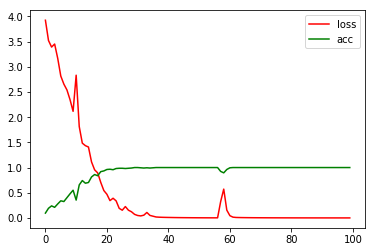

In [13]:
h = history.history

plt.plot(h['loss'], 'r-', label='loss')
plt.plot(h['acc'], 'g-', label='acc')
plt.legend()

In [14]:
y_pred = model.predict_classes(X)

In [15]:
np.array(chars)[y_pred]

array(['.', '전', '저', '7', '3', ' ', '최', '2', '3', '.', '북', '오', ' ',
       '지', ' ', '도', '남', '은', '후', '곳', '비', '리', '.', '\n', '기', '자',
       '=', ' ', ' ', '일', '미', '지', '수', '좋', "'", '존', '보', "'", '후',
       '대', '의', '역', '외', "'", '.', '\n', '오', '?', '산', '기', ' ', ' ',
       '.', '이', '백', '소', '맥', '깊', '산', '아', '라', '도', '부', ' ', '에',
       '산', '樂', ')', ' ', ' ', ' ', '은', '에', '0', '오', '리', ' ', '하',
       '않', ' ', '.', '행', '욕', ' ', '나', '을', '시', ' ', '를', '른', ' ',
       '명', '야', '다', '\n', '행', '에', '외', '차', '를', '르', '모', ' ', '라',
       ' ', '.', '외', '차', '는', '시', '마', '다', '바', '록', '다', '또', '건',
       '충', ' ', '하', '땀', '흘', '저', '이', ' ', ' ', '해', '얇', '겉', ' ',
       '는', '이', '다', '물', '충', ' ', '하', '3', '마', '마', ' ', ' ', ' ',
       '것', '\n', '름', ' ', '과', '이', '동', ' ', '에', '급', '긴', '지', '입',
       ' ', '게', '리', ' ', '에', '여', '증', '마', '증', ' ', '나', '곧', ' ',
       '9', '구', '청', '한', ' ', '과', '급', '어', '식', '든', '증'

### 문장 생성

In [23]:
input = '물을 충분히 좋음 준비 깊은산이 아니'
output = input

In [24]:
for epoch in range(20):
    print(input.replace('\n','$'))
    x = np.zeros([20,len(chars)])
    for i,c in enumerate(input):
        x[i,char_indices[c]]=1
        
    i = model.predict_classes(x[np.newaxis,:,:])
    c = indices_char[i[0]]
    
    input = input[1:]+c
    output += c
    print('>',output.replace('\n','$'))
    print()

물을 충분히 좋음 준비 깊은산이 아니
> 물을 충분히 좋음 준비 깊은산이 아니라

을 충분히 좋음 준비 깊은산이 아니라
> 물을 충분히 좋음 준비 깊은산이 아니라라

 충분히 좋음 준비 깊은산이 아니라라
> 물을 충분히 좋음 준비 깊은산이 아니라라저

충분히 좋음 준비 깊은산이 아니라라저
> 물을 충분히 좋음 준비 깊은산이 아니라라저도

분히 좋음 준비 깊은산이 아니라라저도
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도

히 좋음 준비 깊은산이 아니라라저도도
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도.

 좋음 준비 깊은산이 아니라라저도도.
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 

좋음 준비 깊은산이 아니라라저도도. 
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남

음 준비 깊은산이 아니라라저도도. 남
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남$

 준비 깊은산이 아니라라저도도. 남$
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남$과

준비 깊은산이 아니라라저도도. 남$과
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남$과지

비 깊은산이 아니라라저도도. 남$과지
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남$과지와

 깊은산이 아니라라저도도. 남$과지와
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남$과지와기

깊은산이 아니라라저도도. 남$과지와기
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남$과지와기 

은산이 아니라라저도도. 남$과지와기 
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남$과지와기 자

산이 아니라라저도도. 남$과지와기 자
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남$과지와기 자외

이 아니라라저도도. 남$과지와기 자외
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남$과지와기 자외 

 아니라라저도도. 남$과지와기 자외 
> 물을 충분히 좋음 준비 깊은산이 아니라라저도도. 남$과지와기 자외 =

아니라라저도도. 남$과지와기 자외 